In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from style_feature import style_feature_extraction
from read_path import load_img

In [2]:
# # train('../data_overview/sample.csv', list(range(4, 9, 1)), f_lab = 1, f_gist = 0)
# train('data_preprocessing/sample_1000.csv', list(range(4, 9, 1)), f_lab =1, f_gist = 0, visualize_mode = True)

In [3]:
# train('data_preprocessing/sample_1000.csv', list(range(4, 9, 1)), f_lab = 0, f_gist = 1, visualize_mode = True)

In [3]:
from scipy.spatial.distance import euclidean

In [22]:
def visualize(features, P, kmeans, n_cluster):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(features) + (n_cluster + 1) * 10])

    # Compute the silhouette scores for each sample
    cluster_labels =  kmeans.fit_predict(features)
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    y_lower = 10
    for i in range(n_cluster):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    silhouette_avg = silhouette_score(features, cluster_labels)    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    txmin, txmax = np.min(P), np.max(P)
    t = [(i - txmin)/(txmax - txmin) for i in P]
    
    ax2.set_ylim([0, 1])
    ax2.set_xlim([0, n_cluster])
    colors = cm.spectral(cluster_labels.astype(float) / n_cluster)
    ax2.scatter(cluster_labels, t, marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_cluster),
                 fontsize=14, fontweight='bold')

    plt.show()

In [10]:
def transform(features):
    f0 = np.zeros_like(features[0])
    return [euclidean(f, f0) for f in features]

In [14]:
def     train(data_path, n_cluster_range, f_lab = 0, f_gist = 1, visualize_mode = True):
    data = pd.read_csv(data_path)
    features = np.array([style_feature_extraction(load_img(img_path), lab = f_lab, gist = f_gist) for img_path in data['img_path']])
    kmeans = KMeans(n_clusters = 2, random_state=0).fit(features)
#     P = kmeans.transform(features)
#     print P.shape
    P = transform(features)

    for n_cluster in n_cluster_range:
        kmeans = KMeans(n_clusters = n_cluster, random_state=0).fit(features)
        label = kmeans.labels_
        sil_coef_avg = silhouette_score(features, label, metric='euclidean')
        print("For n_clusters={}, Average Silhouette Coefficient is {}".format(n_cluster, sil_coef_avg))
    
        if visualize_mode == True:
            visualize(features, P, kmeans, n_cluster)

For n_clusters=4, Average Silhouette Coefficient is 0.794133213149


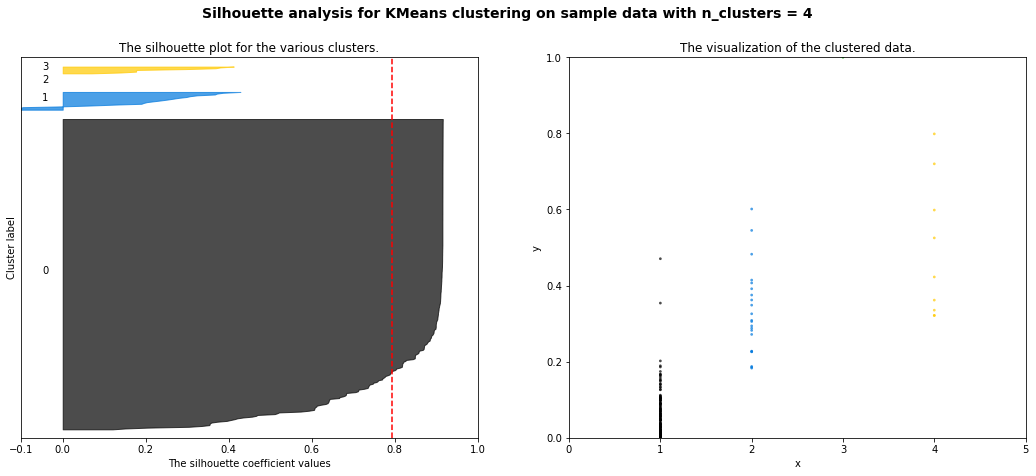

For n_clusters=6, Average Silhouette Coefficient is 0.700306486118


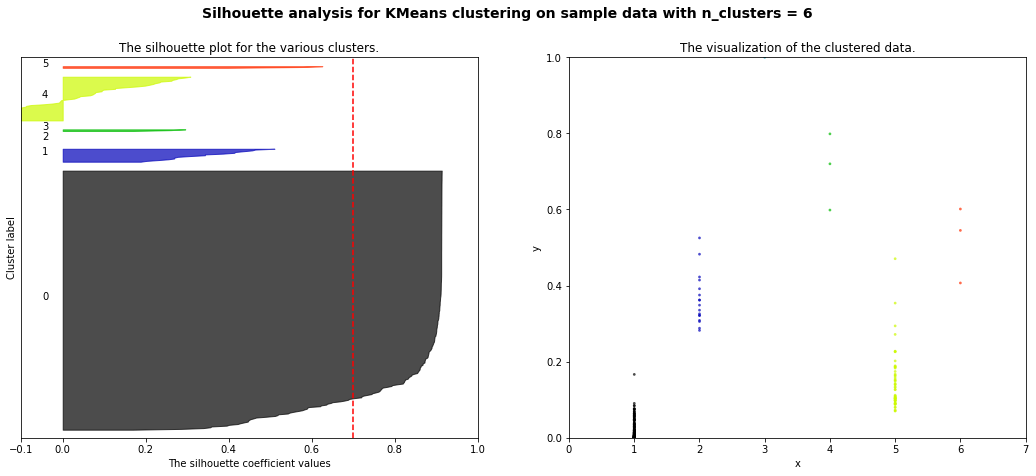

For n_clusters=8, Average Silhouette Coefficient is 0.701882982842


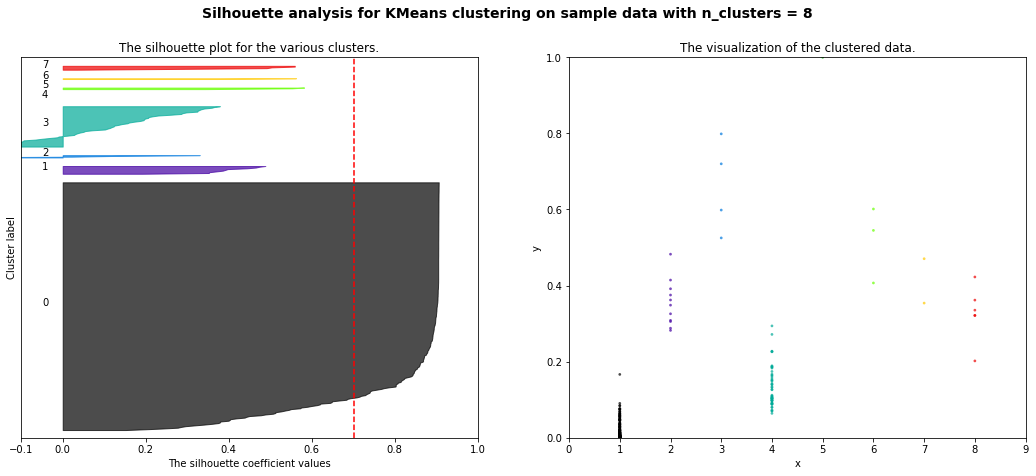

For n_clusters=10, Average Silhouette Coefficient is 0.662332449262


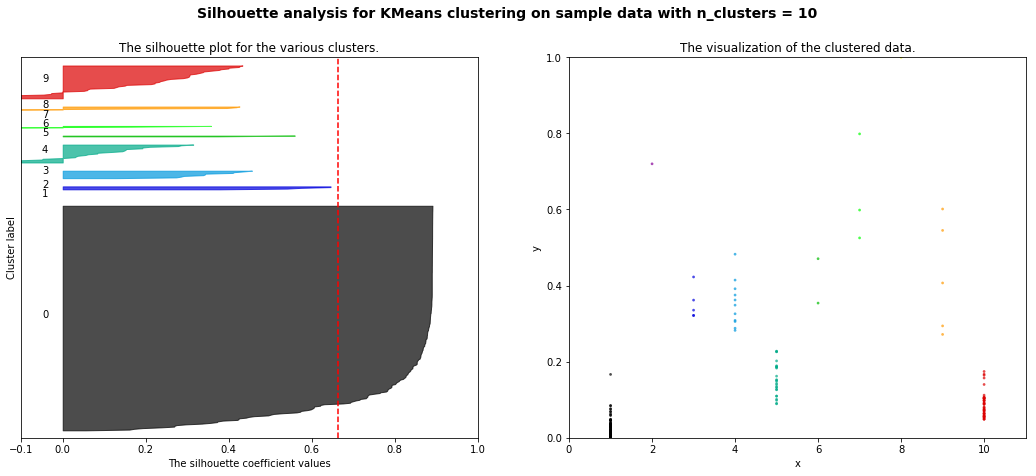

For n_clusters=12, Average Silhouette Coefficient is 0.665928188919


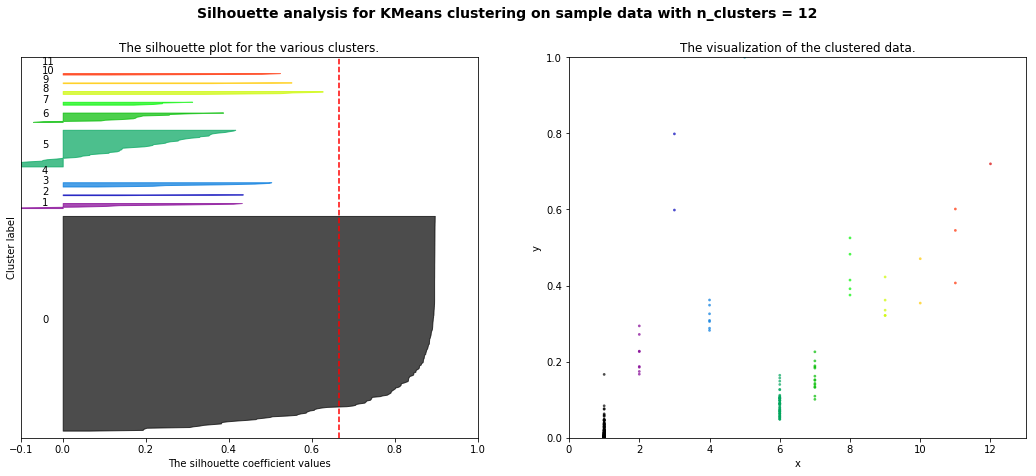

For n_clusters=14, Average Silhouette Coefficient is 0.673862284752


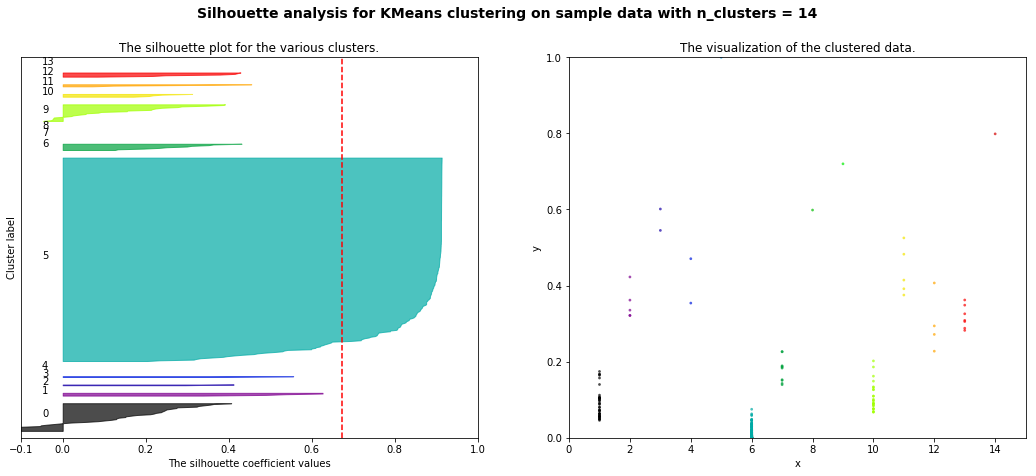

For n_clusters=16, Average Silhouette Coefficient is 0.674166897453


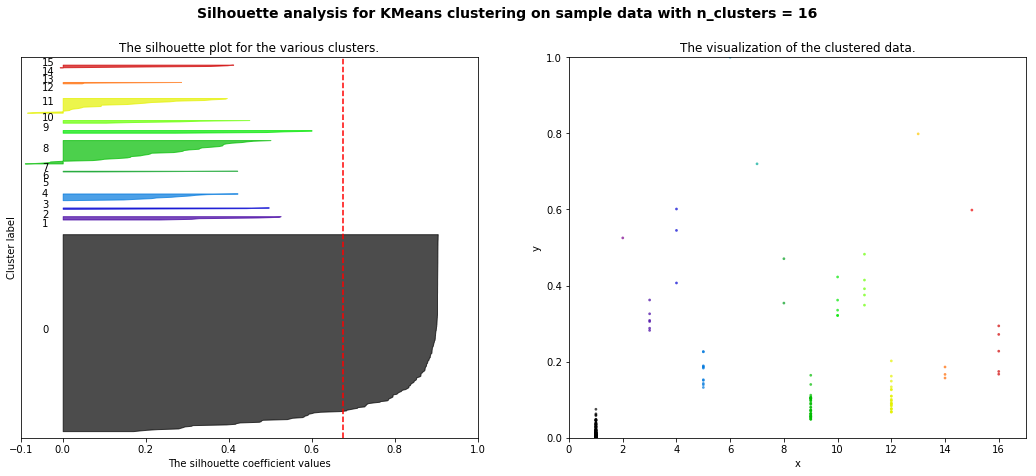

In [18]:
train('../data_overview/sample.csv', list(range(4, 17, 2)), f_lab = 1, f_gist = 0, visualize_mode=True)


In [23]:
train('../data_overview/sample.csv', list(range(1, 6, 1)), f_lab = 0, f_gist = 1, visualize_mode=True)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)